# Retail Data Wrangling and Analytics

In [2]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [1]:
#install psql "driver"
!pip3 install psycopg2-binary

  Using cached https://files.pythonhosted.org/packages/37/6d/483c727d0d14cacc57f28f2efbec5649b61dbdd816f259d5983dbb746d7c/psycopg2_binary-2.8.6-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
You should consider upgrading via the &#39;pip install --upgrade pip&#39; command.


In [8]:
engine_string = ""
engine = ""
retail_df = pd.read_sql_table
retail_df.head()

In [ ]:
retail_df.info()
retail_df.describe()

In [146]:
import pandas as pd
retail_df = pd.read_csv('data/online_retail_II.csv')
# print(retail_df.head())

retail_df.columns = [col.replace(' ', '') for col in retail_df.columns]
retail_df['CustomerID'] = pd.to_numeric(retail_df['CustomerID'])
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df['Invoice'] = retail_df['Invoice'].astype(str)
retail_df['Quantity'] = pd.to_numeric(retail_df['Quantity'])
retail_df['Price'] = retail_df['Price'].astype(float)
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Total Invoice Amount Distribution

In [124]:
# Write your code in one or more cells (please remove this line from your notebook)
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()
    

Minimum:0.19
Mean:523.30
Median:304.31
Mode:15.00
Maximum:168469.60



/var/folders/t2/6rnmbv4j38vcnf1shcvgg20w0000gn/T/ipykernel_76033/3274062736.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


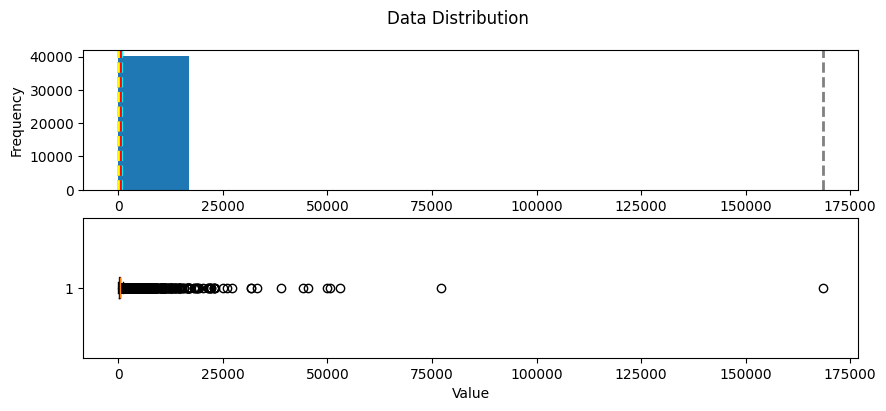

In [128]:
retail_df['OrderTotal'] = retail_df['Quantity'] * retail_df['Price']

# Filter out rows with negative invoice totals
retail_df = retail_df[retail_df['OrderTotal'] > 0]

# Calculate total invoice amount without negative values
invoice_amount = retail_df.groupby('Invoice')['OrderTotal'].sum()
show_distribution(invoice_amount)

Minimum:0.19
Mean:271.68
Median:256.24
Mode:15.00
Maximum:724.25



/var/folders/t2/6rnmbv4j38vcnf1shcvgg20w0000gn/T/ipykernel_76033/3274062736.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


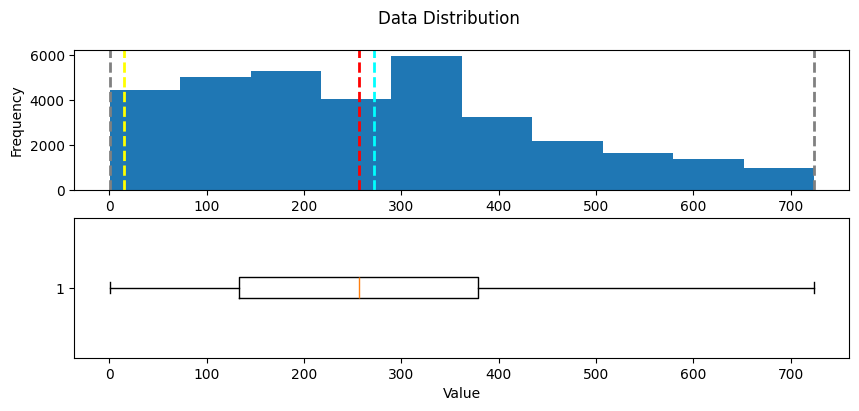

In [129]:
# Calculate the 85th percentile
q85 = invoice_amount.quantile(0.85)

# Filter the data to include only values less than the 85th percentile
filtered_data = invoice_amount[invoice_amount < q85]
show_distribution(filtered_data)

# Monthly Placed and Canceled Orders

In [119]:
retail_df['DateInt'] = retail_df['InvoiceDate'].dt.strftime('%Y%m').astype(int)

# Calculated number of orders and cancelled orders
total_orders = retail_df.groupby('DateInt')['Invoice'].nunique().rename('TotalOrders')
cancelled_orders = retail_df[retail_df['Invoice'].str.startswith('C')].groupby('DateInt')['Invoice'].nunique().rename('Cancellation')

if cancelled_orders.empty:
    placed_orders = total_orders.rename('Placement')
else:
    placed_orders = total_orders - 2 * cancelled_orders.rename('Placement')
    
placed_orders = placed_orders.rename('Placement')


<Axes: xlabel='DateInt'>

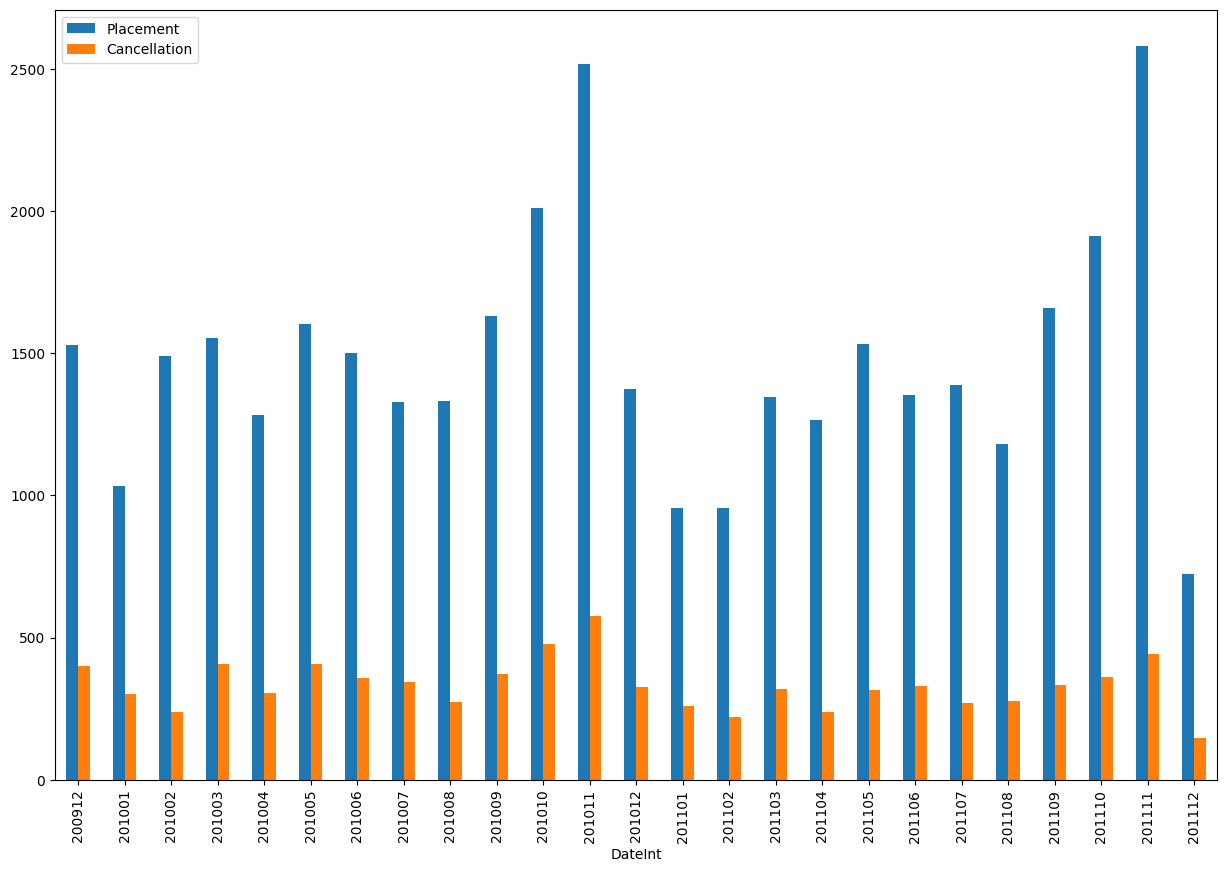

In [117]:
df = pd.concat([placed_orders, cancelled_orders], axis=1).reset_index()
# print(df)
df.plot(x='DateInt', y=['Placement', 'Cancellation'], kind='bar', figsize=(15,10))

# Monthly Sales

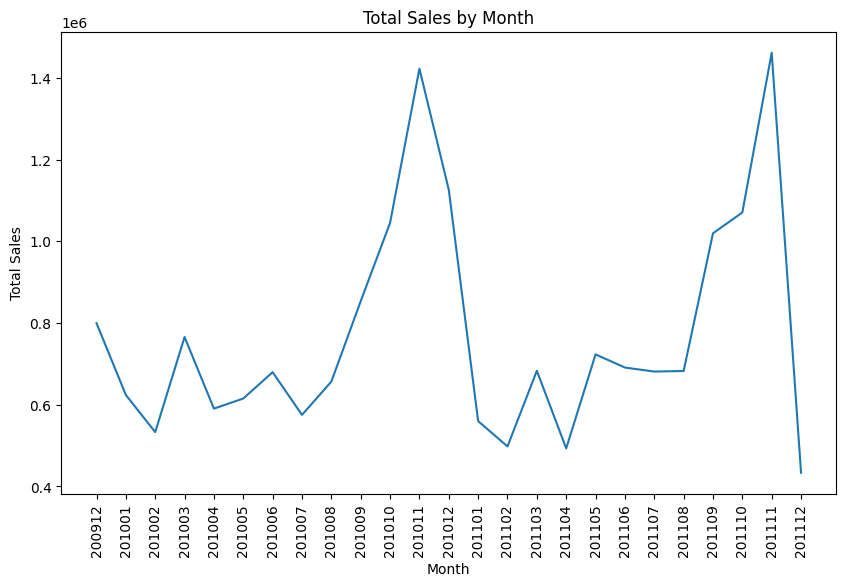

In [114]:
retail_df['Sales'] = retail_df['Quantity'] * retail_df['Price']
retail_df['Sales']=retail_df['Sales'].astype('float')
salesTotal = retail_df.groupby('DateInt')['Sales'].sum().rename('MonthlySales')

salesTotal.index = salesTotal.index.astype('str')

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(salesTotal.index, salesTotal.values)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# Set tick labels for all months 
plt.xticks(salesTotal.index, rotation=90)  
plt.show()

# Monthly Sales Growth


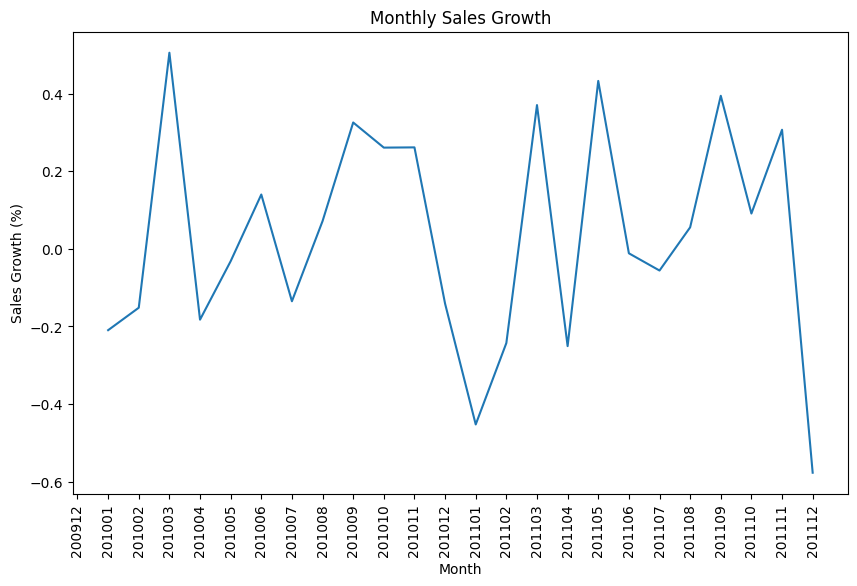

In [136]:
import matplotlib.pyplot as plt
retail_df['Sales'] = retail_df['Quantity'] * retail_df['Price']
retail_df['Sales']=retail_df['Sales'].astype('float')
retail_df['DateInt'] = retail_df['InvoiceDate'].dt.strftime('%Y%m').astype(str)

# Calculate monthly sales
salesTotal = retail_df.groupby('DateInt')['Sales'].sum()
sales_growth = salesTotal.pct_change()

# Plot the monthly sales growth
plt.figure(figsize=(10, 6))
plt.plot(sales_growth.index, sales_growth.values)
plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Sales Growth (%)')
plt.xticks(sales_growth.index, rotation=90)
plt.show()

# Monthly Active Users

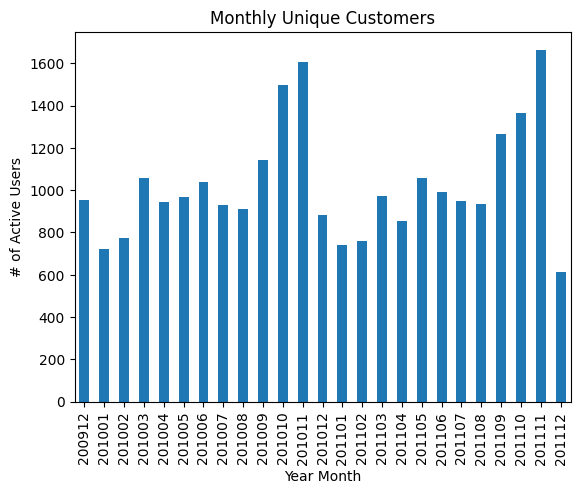

In [141]:
MonthlyUsers = retail_df.groupby('DateInt')['CustomerID'].nunique().rename('MonthlyUsers')

MonthlyUsers.plot(x='DateInt', y='MonthlyUsers', kind='bar')
plt.title('Monthly Unique Customers')
plt.xlabel('Year Month')
plt.ylabel('# of Active Users')
plt.show()

# New and Existing Users



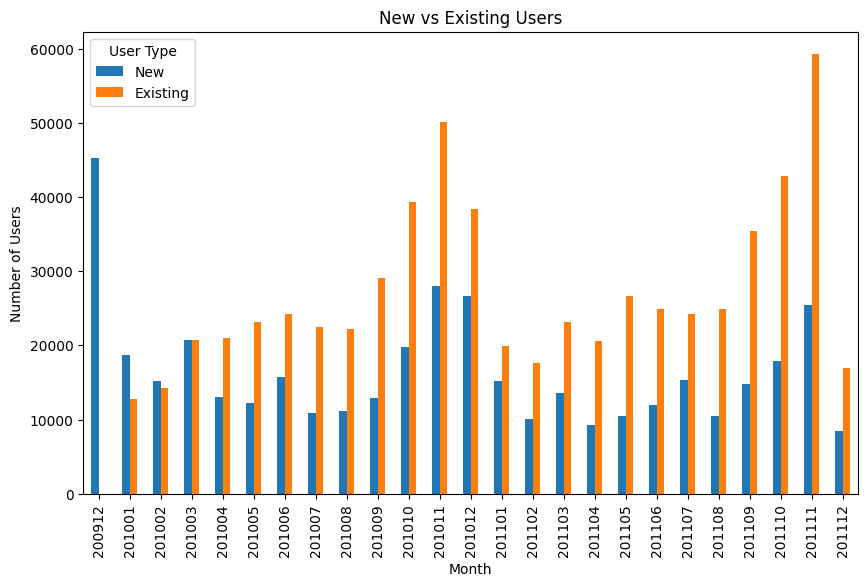

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

retail_df['DateInt'] = retail_df['InvoiceDate'].dt.strftime('%Y%m').astype(str)

# Find the first purchase year-month for each user
first_purchase = retail_df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
#first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']


###
#first_purchase = retail_df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
first_purchase['FirstPurchaseDate'] = first_purchase['InvoiceDate'].dt.strftime('%Y%m').astype(str)
new_user_count = first_purchase.groupby('FirstPurchaseDate')['CustomerID'].nunique().rename('new_user')
###


# Join with the transactional data to identify new/existing users
retail_df = retail_df.merge(first_purchase, on='CustomerID', how='left', suffixes=('', '_first_purchase'))
retail_df['UserType'] = 'New'
retail_df.loc[retail_df['DateInt'] > retail_df['FirstPurchaseDate'], 'UserType'] = 'Existing'

# Group by YearMonth and UserType to calculate the count of new and existing users
user_type_counts = retail_df.groupby(['DateInt', 'UserType']).size().unstack(fill_value=0)

# Reset index before plotting
user_type_counts = user_type_counts.reset_index()

# Plot the diagram
user_type_counts.plot(x='DateInt', y=['New', 'Existing'], kind='bar', stacked=False, figsize=(10, 6))
plt.title('New vs Existing Users')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.legend(title='User Type')
plt.show()



## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [175]:
import pandas as pd

retail_df['Sales'] = retail_df['Quantity'] * retail_df['Price']

# Calculate Recency, Frequency, and Monetary Value for each customer
recency = retail_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (pd.to_datetime('today') - recency['InvoiceDate']).dt.days
recency.drop('InvoiceDate', axis=1, inplace=True)

frequency = retail_df.groupby('CustomerID')['Invoice'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

monetary = retail_df.groupby('CustomerID')['Sales'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Merge Recency, Frequency, and Monetary Value into one DataFrame
rfm_table = pd.merge(recency, frequency, on='CustomerID')
rfm_table = pd.merge(rfm_table, monetary, on='CustomerID')

# Display the RFM table
print(rfm_table)


      CustomerID  Recency  Frequency  Monetary
0        12346.0     4845         17    -64.68
1        12347.0     4522          8   5633.32
2        12348.0     4595          5   2019.40
3        12349.0     4538          5   4404.54
4        12350.0     4830          1    334.40
...          ...      ...        ...       ...
5937     18283.0     4523         22   2736.65
5938     18284.0     4949          2    436.68
5939     18285.0     5180          1    427.00
5940     18286.0     4996          3   1188.43
5941     18287.0     4562          8   4177.89

[5942 rows x 4 columns]


# RFM Segmentation

---
**Please remove this insturction cell after you are done with coding**
RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way. In this article, we will show you how to make an RFM segmentation based on an RFM score combining all three RFM parameters together and allowing you to divide your customers into 11 different segments. 

- [RFM Segmentation business cases](https://docs.exponea.com/docs/rfm-segmentation-business-use)

- [RFM Segmentation Guide](https://docs.exponea.com/docs/rfm-segmentation-business-use)

As you can see, computing RFM segmentation requires extensive domain knowledge in marketing which is out of the scope in this project. In practice, you will work with BA/DA to figure out how to compute RFM segments. To simplify this project, a [sample RFM segmentation Notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) is provided. You are responsible to understand everything from that Notebook and then integrate it into yours. 

- Download the [sample notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) and import to your Jupyter Notebook or VSCode
- Run the notebook and understand all cells
- Read the remark section at the end of the notebook. You will need this information when writing the README file
- Integrate the RFM segmentation calculation into your notebook

---

# Business Problem

An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.  

For this, we will define the behavior of customers and create groups according to the clusters in these behaviors.  

In other words, we will take those who exhibit common behaviors into the same groups and we will try to develop sales and marketing specific techniques to these groups.  

In [178]:
#installation of libraries
import pandas as pd
import numpy as np
import seaborn as sns

#to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#we determined how many numbers to show after comma
pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

In [180]:
#calling the dataset
df = pd.read_csv("data/online_retail_II.csv")

# Data Understanding

In [181]:
#selection of the first 5 observations
df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1,13085,United Kingdom


In [182]:
#ranking of the most ordered products
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
WHITE HANGING HEART T-LIGHT HOLDER,93050
ASSORTED COLOUR BIRD ORNAMENT,81306
JUMBO BAG RED RETROSPOT,78090
BROCADE RING PURSE,70700


In [183]:
#how many invoices are there in the data set
df["Invoice"].nunique()

53628

In [184]:
#which are the most expensive products?
df.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970,15098,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111,NaN,United Kingdom
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111,17399,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18911,NaN,United Kingdom
1050063,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836,NaN,United Kingdom


In [185]:
#top 5 countries with the highest number of orders
df["Country"].value_counts().head()

Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Name: count, dtype: int64

In [186]:
#total spending was added as a column
df['TotalPrice'] = df['Price']*df['Quantity']

In [187]:
#which countries did we get the most income from
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,16382584
EIRE,615520
Netherlands,548525
Germany,417989
France,328192


# Data Preparation

In [188]:
df["InvoiceDate"].min() #oldest shopping date

'2009-12-01 07:45:00'

In [189]:
df["InvoiceDate"].max() #newest shopping date

'2011-12-09 12:50:00'

In [201]:
#to make the assessment easier, today's date is set as January 1, 2012.  
today = pd.Timestamp(2012,1,1) 
today

Timestamp('2012-01-01 00:00:00')

In [191]:
#changing the data type of the order date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [194]:
#taking values greater than 0, this will be easier in terms of evaluation
df = df[df['Quantity'] > 0]
df = df[df['TotalPrice'] > 0]

In [195]:
df.dropna(inplace = True) #removal of observation units with missing data from df

In [196]:
df.shape #size information

(805549, 9)

In [197]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T
#explanatory statistics values of the observation units corresponding to the specified percentages
#processing according to numerical variables

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
Quantity,805549,13,1,1,1,1,2,5,12,24,36,128,80995,144
InvoiceDate,805549,2011-01-02 10:24:44.106814464,2009-12-01 07:45:00,2009-12-04 14:14:00,2010-01-18 13:34:00,2010-03-04 14:27:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:05:00,2011-11-01 14:51:00,2011-11-20 15:00:00,2011-12-05 17:17:00,2011-12-09 12:50:00,NaN
Price,805549,3,0,0,0,1,1,2,4,7,8,15,10954,29
Customer ID,805549,15332,12346,12422,12681,12979,13982,15271,16805,17716,17913,18204,18287,1697
TotalPrice,805549,22,0,1,1,2,5,12,20,35,68,202,168470,224



# Finding RFM Score

RFM consists of Recency, Frequency, Monetary initials of expressions.

It is a technique that helps determine marketing and sales strategies based on buying habits of customers.

- Recency: Time since customer last purchase

- Frequency: Total number of purchases.

- Monetary: Total spending by the customer.

In [198]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,83
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,81
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,81
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2,13085,United Kingdom,101
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1,13085,United Kingdom,30


In [199]:
df.info() 
#dataframe's index dtype and column dtypes, non-null values and memory usage information

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   TotalPrice   805549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


In [202]:
# finding Recency and Monetary values.
df_x = df.groupby('Customer ID').agg({'TotalPrice': lambda x: x.sum(), #monetary value
                                        'InvoiceDate': lambda x: (today - x.max()).days}) #recency value
#x.max()).days; last shopping date of customers

In [203]:
df_y = df.groupby(['Customer ID','Invoice']).agg({'TotalPrice': lambda x: x.sum()})
df_z = df_y.groupby('Customer ID').agg({'TotalPrice': lambda x: len(x)}) 
#finding the frequency value per capita

In [204]:
#creating the RFM table
rfm_table= pd.merge(df_x,df_z, on='Customer ID')

In [205]:
#determination of column names
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'TotalPrice_y': 'Frequency',
                          'TotalPrice_x': 'Monetary'}, inplace= True)

In [206]:
rfm_table.head()

,Monetary,Recency,Frequency
Customer ID,,,
12346,77556,347,12
12347,5633,24,8
12348,2019,97,5
12349,4429,40,4
12350,334,332,1


**Table Comment:** The customer with the 12346th Customer ID made a purchase of £ 77.556. The last purchase of this customer is about 1 year ago (347 days) and the number of purchases is 12.

In [207]:
#RFM score values 
rfm_table['RecencyScore'] = pd.qcut(rfm_table['Recency'],5,labels=[5,4,3,2,1])
rfm_table['FrequencyScore'] = pd.qcut(rfm_table['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['MonetaryScore'] = pd.qcut(rfm_table['Monetary'],5,labels=[1,2,3,4,5])

In [208]:
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,77556,347,12,2,5,5
12347,5633,24,8,5,4,5
12348,2019,97,5,3,4,4
12349,4429,40,4,5,3,5
12350,334,332,1,2,1,2


In [209]:
#RFM score values are combined side by side in str format
(rfm_table['RecencyScore'].astype(str) + 
 rfm_table['FrequencyScore'].astype(str) + 
 rfm_table['MonetaryScore'].astype(str)).head()

Customer ID
12346    255
12347    545
12348    344
12349    535
12350    212
dtype: object

In [210]:
#calculation of the RFM score
rfm_table["RFM_SCORE"] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str) + rfm_table['MonetaryScore'].astype(str)

In [211]:
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,77556,347,12,2,5,5,255
12347,5633,24,8,5,4,5,545
12348,2019,97,5,3,4,4,344
12349,4429,40,4,5,3,5,535
12350,334,332,1,2,1,2,212


In [212]:
#transposition of the RFM table. This makes it easier to evaluate.
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,5878,3019,14738,3,349,899,2307,608822
Recency,5878,223,209,22,47,117,401,760
Frequency,5878,6,13,1,1,3,7,398


In [213]:
#customers with RFM Score 555
rfm_table[rfm_table["RFM_SCORE"] == "555"].head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,5356,25,11,5,5,5,555
12395,5067,41,15,5,5,5,555
12417,6817,25,20,5,5,5,555
12433,20581,22,10,5,5,5,555
12437,12683,23,39,5,5,5,555


In [214]:
#customers with RFM Score 111
rfm_table[rfm_table["RFM_SCORE"] == "111"].head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12387,144,437,1,1,1,1,111
12392,235,613,1,1,1,1,111
12400,205,436,1,1,1,1,111
12404,63,704,1,1,1,1,111
12416,203,678,1,1,1,1,111


In [215]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [216]:
#creation of segment variable
rfm_table['Segment'] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

In [217]:
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,77556,347,12,2,5,5,255,Can't Lose
12347,5633,24,8,5,4,5,545,Champions
12348,2019,97,5,3,4,4,344,Loyal Customers
12349,4429,40,4,5,3,5,535,Potential Loyalists
12350,334,332,1,2,1,2,212,Hibernating


In [218]:
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep          129   388         1   388      532   388
At Risk                 395   750         4   750     1384   750
Can't Lose              353    71        16    71     8356    71
Champions                30   852        19   852    10796   852
Hibernating             481  1522         1  1522      438  1522
Loyal Customers          89  1147        10  1147     4200  1147
Need Attention          135   269         3   269     1283   269
New Customers            32    56         1    56      356    56
Potential Loyalists      47   713         3   713     1155   713
Promising                60   110         1   110      324   110

We grouped the rfm table according to the mean and count values of the segment variable.

## Remark:

3 segments selected for evaluation are "Can't Lose", "Hibernating" and "Champions".

Number of customers for segments:

Can't Lose = 71, Hibernating = 1522, Champions = 852

- Can't Lose Segment;

    - The last shopping date of the customers is on average 353 days before.
    - Customers have made an average of 16 purchases.
    - Customers spent an average of £ 8356.
- Hibernating Segment;

    - The last shopping date of the customers is 481 days before average.
    - Customers made an average of 1 purchases.
    - Customers spent an average of £ 438.
- Champions Segment;

    - The last shopping date of the customers is 30 days before average.
    - Customers made an average of 19 purchases.
    - Customers spent an average of £ 10796.

- Can't Lose Segment;

    - Customers in this segment have not recently made a purchase. For this reason, we need to prepare a discount and gift campaign for this segment. These customers made a large number of purchases when they made purchases before. However, recency values are lower than they should be. The campaign to be implemented for these customers should include both items purchased and recommendations based on previous activities. New and popular products associated with the products that they were interested in can also be included in this campaign. Situations that will cause these customers to stop buying need to be investigated.
- Hibernating Segment;

    - Customers in this segment have not made a purchase for a long time. However, by offering discounts, they may be attracted to another purchase.
- Champions Segment;

    - Customers in this segment are responsible for most of the revenue. Campaigns should be implemented to ensure the continuity of the shopping of these customers.

Resources;

- https://docs.exponea.com/docs/rfm-segmentation

- Recency and Frequency Grid Image: https://clevertap.com/blog/automate-user-segmentation-with-rfm-analysis/